**Due: 4 PM on Wednesday, 10 Feb 2016**

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

**Note**: These exercises will involve quite a bit more code writing than the first 2 homework assignments so start early. They are also intentionally less specific so that you have to come up with your own plan to complete the exercises.

We will use the following data sets:
```python
titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")
```

**Q1 (20 pts)** Working with `numpy.random`.

**Part 1 (10 pts)** Consider a sequence of $n$ Bernoulli trials with success probabilty $p$ per trial. A string of consecutive successes is known as a success *run*. Write a function that returns the counts for runs of length $k$ for each $k$ observed in a dictionary.

For example: if the trials were [0, 1, 0, 1, 1, 0, 0, 0, 0, 1], the function should return 
```
{1: 2, 2: 1})
```

In [41]:
from collections import Counter

def count_runs(xs):
    """Count number of success runs of length k."""
    ys = []
    count = 0
    for x in xs:
        if x == 1:
            count += 1        
        else:
            if count: ys.append(count)
            count = 0
    if count: ys.append(count)
    return Counter(ys)

In [42]:
count_runs([0, 1, 0, 1, 1, 0, 0, 0, 0, 1],)

Counter({1: 2, 2: 1})

In [44]:
count_runs(np.random.randint(0,2,1000000))

Counter({1: 124950,
         2: 62561,
         3: 31402,
         4: 15482,
         5: 7865,
         6: 3856,
         7: 1968,
         8: 971,
         9: 495,
         10: 233,
         11: 140,
         12: 71,
         13: 32,
         14: 13,
         15: 9,
         16: 3})

**Part 2 (10 pts)** Continuing from Part 1, what is the probability of observing at least one run of length 5 or more when $n=100$ and $p=0.5$?. Estimate this from 100,000 simulated experiments. Is this more, less or equally likely than finding runs of length 7 or more when $p=0.7$?

In [3]:
def run_prob(expts, n, k, p):
    xxs = np.random.choice([0,1], (expts, n), p=(1-p, p))
    return sum(max(d.keys()) >= k for d in map(count_runs, xxs))/expts

In [4]:
run_prob(expts=100000, n=100, k=5, p=0.5)

0.80704

In [5]:
run_prob(expts=100000, n=100, k=7, p=0.7)

0.94881

### Exact solution (to discuss in class)

$$
s_n = \sum_{i=1}^n{f_i} \\
f_n = u_n - \sum_{i=1}^{n-1} {f_i u_{n-i}} \\
u_n = p^k - \sum_{i=1}^{k-1} u_{n-i} p_i
$$

In [1]:
from functools import lru_cache

@lru_cache()
def s(n, k, p):
    return sum(f(i, k, p) for i in range(1, n+1))

@lru_cache()
def f(n, k, p):
    return u(n, k, p) - sum(f(i, k, p) * u(n-i, k, p) for i in range(1, n))

@lru_cache()
def u(n, k, p):
    if n < k: return 0
    return p**k - sum(u(n-i, k, p) * p**i for i in range(1, k))

In [2]:
s(100, 5, 0.5)

0.8101095991963579

In [3]:
s(100, 7, 0.7)

0.9491817984156692

**Q3. (30 pts)** 

Using your favorite machine learning classifier from `sklearn`, find the 2 most important predictors of survival on the Titanic. Do any exploratory visualization , data preprocessing, dimension reduction, grid search and cross-validation that you think is helpful. In particular,your code should handle categorical variables appropriately. Compare the accuracy of prediction using only these 2 predictors and using all non-redundant predictors.

In [6]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic.drop(['alive', 'embarked', 'class', 'who', 'adult_male'], axis=1, inplace=True)
titanic.dropna(axis=0, inplace=True)

In [8]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
deck           category
embark_town      object
alone              bool
dtype: object

In [9]:
# Drop last dummy column to avoid collineairty
df = pd.concat([pd.get_dummies(titanic[col]).ix[:, :-1] 
               if titanic[col].dtype == object or hasattr(titanic[col], 'cat')
               else titanic[col]
               for col in titanic.columns], axis=1)

In [10]:
df.head()

,survived,pclass,female,age,sibsp,parch,fare,A,B,C,D,E,F,Cherbourg,Queenstown,alone
1,1,1,1,38,1,0,71.2833,0,0,1,0,0,0,1,0,False
3,1,1,1,35,1,0,53.1000,0,0,1,0,0,0,0,0,False
6,0,1,0,54,0,0,51.8625,0,0,0,0,1,0,0,0,True
10,1,3,1,4,1,1,16.7000,0,0,0,0,0,0,0,0,False
11,1,1,1,58,0,0,26.5500,0,0,1,0,0,0,0,0,True


In [11]:
df.shape

(182, 16)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [13]:
y = df.ix[:, 0]
X = df.ix[:, 1:]

In [14]:
clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### What are the top 5 features?

In [15]:
sorted(zip(clf.feature_importances_, df.columns), key=lambda x: -x[0])[:5]

[(0.28826989813906079, 'female'),
 (0.27144100215648859, 'parch'),
 (0.19446660400234264, 'pclass'),
 (0.04120451483820918, 'sibsp'),
 (0.039793872735951683, 'F')]

The most improtant predictors using the RandomFroest classifier are `sex`, `parch` and `pclass` where `parch` is the number of parents/children aboard.

### Using all features

In [16]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.62295081967213117

### Using top 5 features

In [17]:
var_idx = clf.feature_importances_.argsort()[-5:]
clf.fit(X_train[var_idx], y_train)
clf.score(X_test[var_idx], y_test)

0.75409836065573765

**Q4. (25 pts)**

Using `sklearn`, perform unsupervised learning of the iris data using 2 different clustering methods. Do NOT assume you know the number of clusters - rather the code should either determine it from the data or compare models with different numbers of components using some appropriate test statistic. Make a pairwise scatter  plot of the four predictor variables indicating cluster by color for each unsupervised learning method used.

### One approach using information criteia

Any ohter sensible approach will do - I am just too lazy to code them here.

In [18]:
from sklearn.mixture import GMM

def best_fit(data, low, high, criteria):
    """Find 'best' number of clusters using given criteria."""    
    best =(np.infty, None)
    for k in range(low, high):
        gmm = GMM(n_components=k, covariance_type='full')
        gmm.fit(X=data)
        c = getattr(gmm, criteria)(X=data)
        if c < best[0]:
            best = (c, k)
            labels = gmm.predict(X=data)
    return labels, best

In [19]:
iris = sns.load_dataset('iris')

### Using AIC

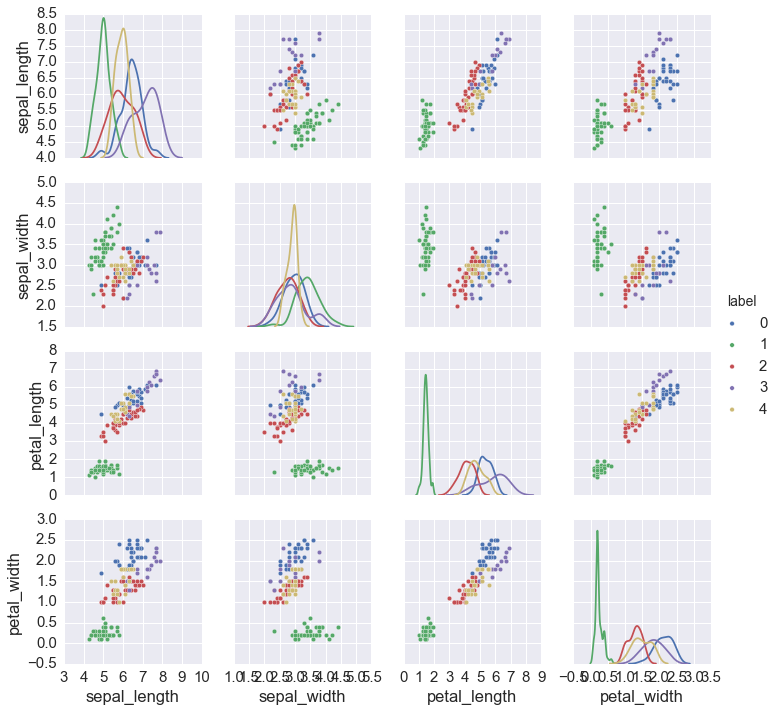

In [20]:
labels, best = best_fit(iris.ix[:, :4], 1, 11, 'aic')
iris['label'] = labels
sns.pairplot(iris, hue='label', diag_kind='kde',
            x_vars=iris.columns[:4], y_vars=iris.columns[:4])
pass

### Using BIC

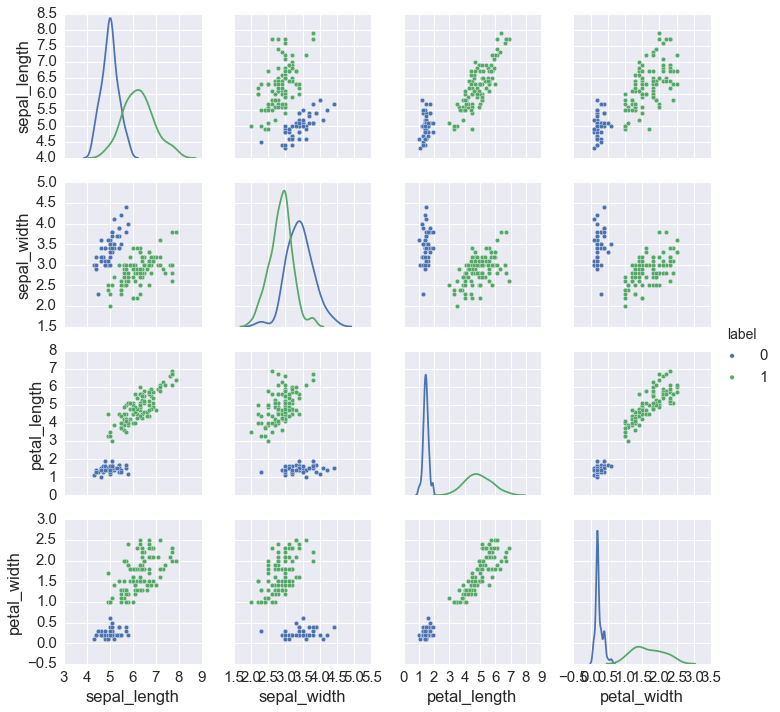

In [21]:
labels, best = best_fit(iris.ix[:,:4], 1, 11, 'bic')
iris['label'] = labels
sns.pairplot(iris, hue='label', diag_kind='kde',
            x_vars=iris.columns[:4], y_vars=iris.columns[:4])
pass

**Q5. (50 pts)**

Write code to generate a plot similar to the following ![figure](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif) using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

In [22]:
def make_map(rule):
    """Convert an integer into a rule mapping nbr states to new state."""
    bits = map(int, list(bin(rule)[2:].zfill(8)))
    return dict(zip(range(7, -1, -1), bits))

In [23]:
def make_ca(rule, init, niters):
    """Run a 1d CA from init state for niters for given rule."""
    mapper = make_map(rule)
    grid = np.zeros((niters, len(init)), 'int')
    grid[0] = init
    old = np.r_[init[-1:], init, init[0:1]]
    for i in range(1, niters):
        nbrs = zip(old[0:], old[1:], old[2:])
        cells = (int(''.join(map(str, nbr)), base=2) for nbr in nbrs)
        new = np.array([mapper[cell] for cell in cells])
        grid[i] = new
        old = np.r_[new[-1:], new, new[0:1]]
    return grid

In [24]:
from matplotlib.ticker import NullFormatter, IndexLocator

def plot_grid(rule, grid, ax=None):
    if ax is None:
        ax = plt.subplot(111)
    with plt.style.context('seaborn-white'):
        ax.grid(True, which='major', color='grey', linewidth=0.5)
        ax.imshow(grid, interpolation='none', cmap='Greys', aspect=1, alpha=0.8)
        ax.xaxis.set_major_locator(IndexLocator(1, 0))
        ax.yaxis.set_major_locator(IndexLocator(1, 0))
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.yaxis.set_major_formatter( NullFormatter() )
        ax.set_title('Rule %d' % rule)

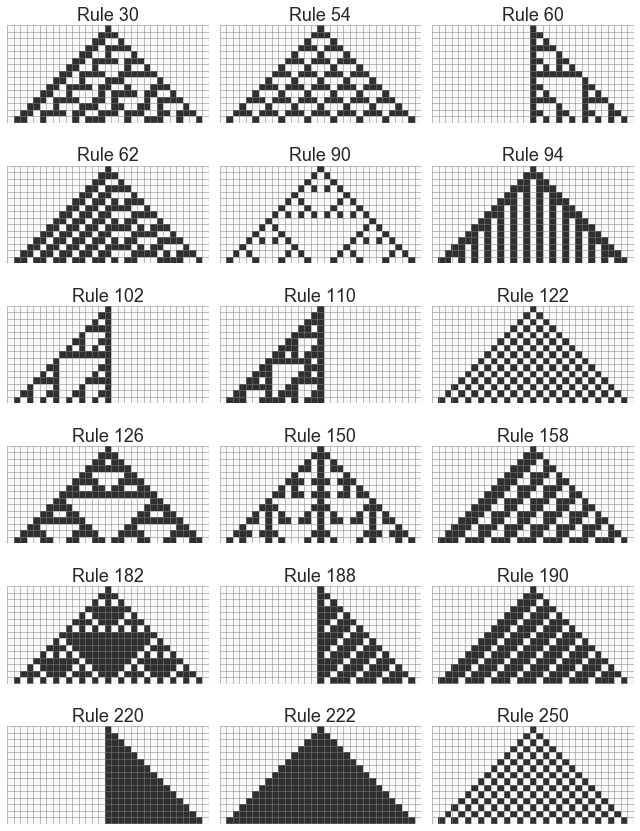

In [25]:
niter = 15
width = niter*2+1
init = np.zeros(width, 'int')
init[width//2] = 1
rules = np.array([30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
                  150, 158, 182, 188, 190, 220, 222, 250]).reshape((-1, 3))

nrows, ncols = rules.shape
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*2))
for i in range(nrows):
    for j in range(ncols):
        grid = make_ca(rules[i, j], init, niter)
        plot_grid(rules[i, j], grid, ax=axes[i,j])
plt.tight_layout()